In [202]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from pyEDM import *
from causal_ccm import *
from tqdm import tqdm # for showing progress bar in for loops
from Process import *

jan_22 = loadmat("w20160122_neurons.mat")

In [191]:
spikes = jan_22['spikeCount']
neurons = jan_22['Neurons']
bins = jan_22['Bin']
beh = jan_22['beh']

In [192]:
spikes = np.swapaxes(spikes, 0, 1)
spikes.shape

(585, 1923, 201)

In [199]:
len(get_single_trial_data(spikes, 0))

585

In [157]:
aNeurons = []
bNeurons = []
cNeurons = []
dNeurons = []
eNeurons = []
fNeurons = []
gNeurons = []
hNeurons = []

for n in range(0,584):
    if neurons[n][1][0] == 'A':
        aNeurons.append(n)
    if neurons[n][1][0] == 'B':
        bNeurons.append(n)
    if neurons[n][1][0] == 'C':
        cNeurons.append(n)
    if neurons[n][1][0] == 'D':
        dNeurons.append(n)
    if neurons[n][1][0] == 'E':
        eNeurons.append(n)
    if neurons[n][1][0] == 'F':
        fNeurons.append(n)
    if neurons[n][1][0] == 'G':
        gNeurons.append(n)
    if neurons[n][1][0] == 'H':
        hNeurons.append(n)

In [158]:
waldo = []
voltaire = []
for n in range(0,584):
    if neurons[n][0] == 'W':
        waldo.append(n)
    if neurons[n][0] == 'v':
        voltaire.append(n)

In [159]:
# only include time bins 101 through 181
def filter_time_bins(spikes):
    relevant_spikes = []
    for train in spikes:
        spike_train = []

        for trial in train:
            spike_train.extend(trial[101:181].tolist())

        relevant_spikes.append(spike_train)
    return relevant_spikes

In [161]:
filtered_spikes = filter_time_bins(spikes)
# filtered spikes only include time bins 101 through 180
filtered_spikes = np.array(filtered_spikes)
filtered_spikes.shape

(585, 153840)

In [162]:

#get only spike trains from the last 30 trials after 20 trials of uncertainty
truncated = np.empty([585,2400])



In [163]:
i = 0 
for train in filtered_spikes: 
    truncated[i] = train[4000:6400]
    i+=1
    
truncated.shape

(585, 2400)

In [164]:


kernel_size = 5
smoothed = moving_average(truncated, kernel_size)

smoothed.shape

(585, 2400)

In [111]:
from skccm.utilities import train_test_split

#split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() #initiate the class

#library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

#test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

NameError: name 'X1' is not defined

In [73]:
from pyEDM import *
from causal_ccm import *

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm # for showing progress bar in for loops
import numpy as np

In [174]:
fNeurons

[133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215]

In [176]:
tau = 1
E = 4
L = 2400
corr_matrix_F= np.empty([83,83])
i = 0
for k in range(133,216):
    j = 0
    for l in range(133,216):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
        corr_matrix_F[i][j]= max(ccm_XY, ccm_YX)
        j+=1
    i+=1

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [179]:
tau = 1
E = 4
L = 2400
corr_matrix_B = np.empty([110,110])
i = 0
for k in range(0,110):
    j = 0
    for l in range(0,110):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
        corr_matrix_B[i][j]= max(ccm_XY, ccm_YX)
        j+=1
    i+=1

In [94]:
tau = 1
E = 4
L = 2400
corr_matrix_BC= np.empty([110,77])
i = 0
for k in range(0,110):
    j = 0
    for l in range(306,383):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
        corr_matrix_BC[i][j]= max(ccm_XY, ccm_YX)
        j+=1
    i+=1


/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


(110, 77)

In [120]:
corr_matrix_BC.shape

(110, 77)

In [107]:
linkage(corr_matrix_BC).shape

(109, 4)

In [129]:
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [177]:
corr_matrix_F[np.isnan(corr_matrix_F)] = 0

Text(0.5, 1.0, 'Hierarchical Clustering Grouped Heatmap for Region F Neuron CCM')

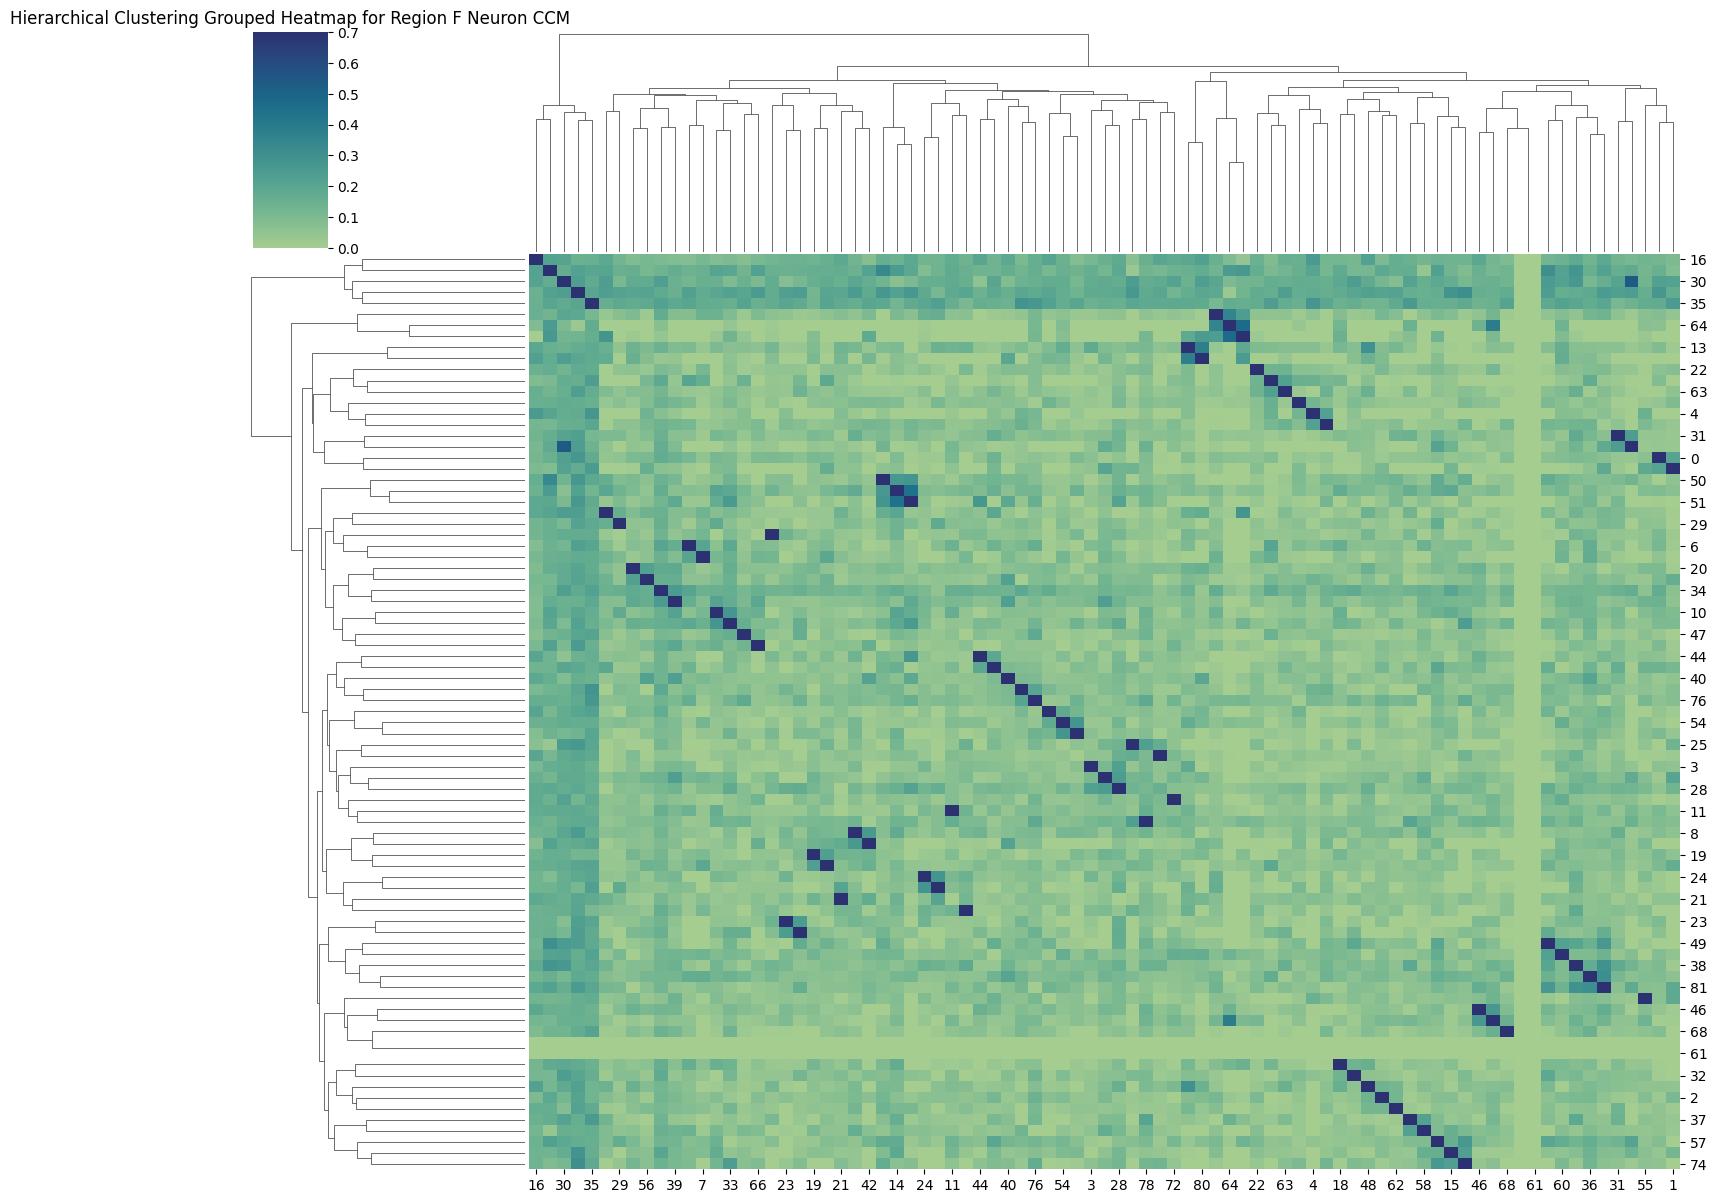

In [178]:
sns.clustermap(corr_matrix_F, method="complete", cmap='crest', annot = False, vmin=0, vmax=.7, figsize=(15,12));
plt.title("Hierarchical Clustering Grouped Heatmap for Region F Neuron CCM")

Text(0.5, 1.0, 'Hierarchical Clustering Grouped Heatmap for Region C Neuron CCM')

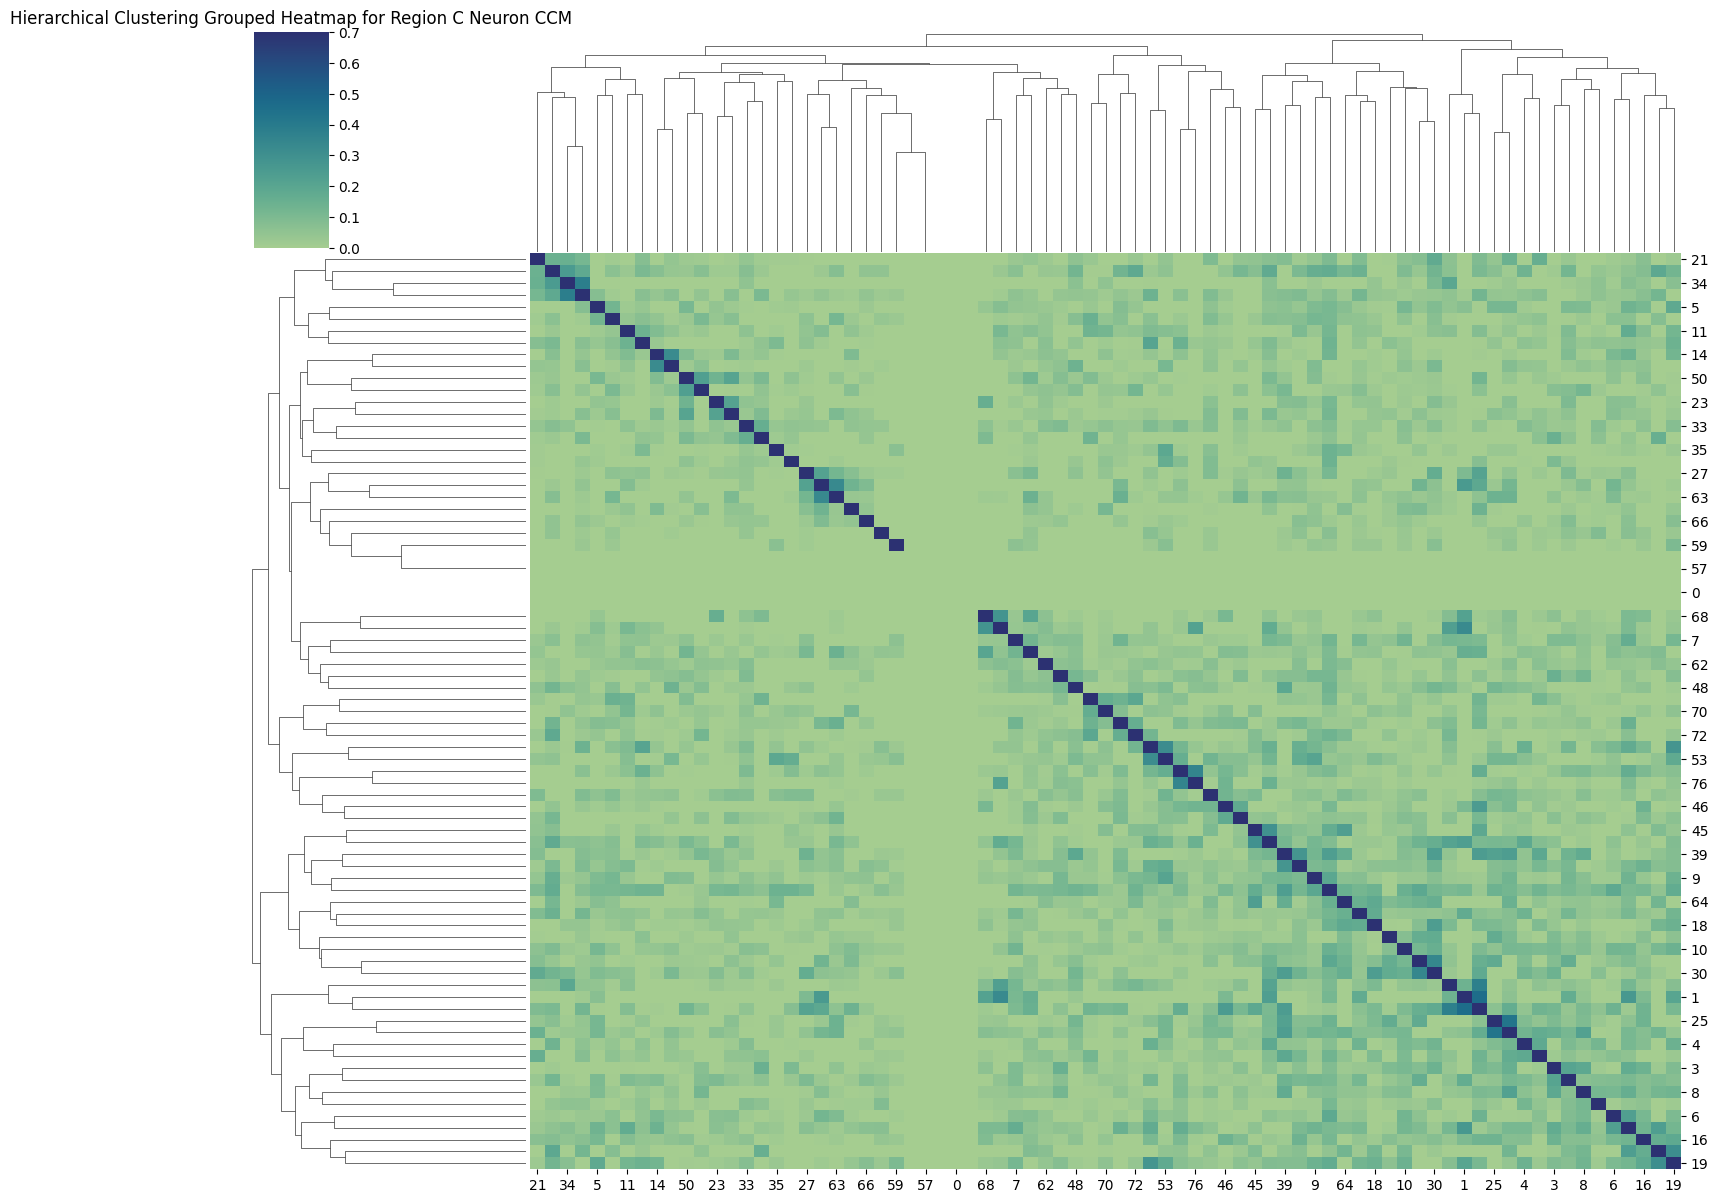

In [131]:

sns.clustermap(corr_matrix_C, method="complete", cmap='crest', annot = False, vmin=0, vmax=.7, figsize=(15,12));
plt.title("Hierarchical Clustering Grouped Heatmap for Region C Neuron CCM")


Text(0.5, 1.0, 'Hierarchical Clustering Grouped Heatmap for Regions B and C Neuron CCM')

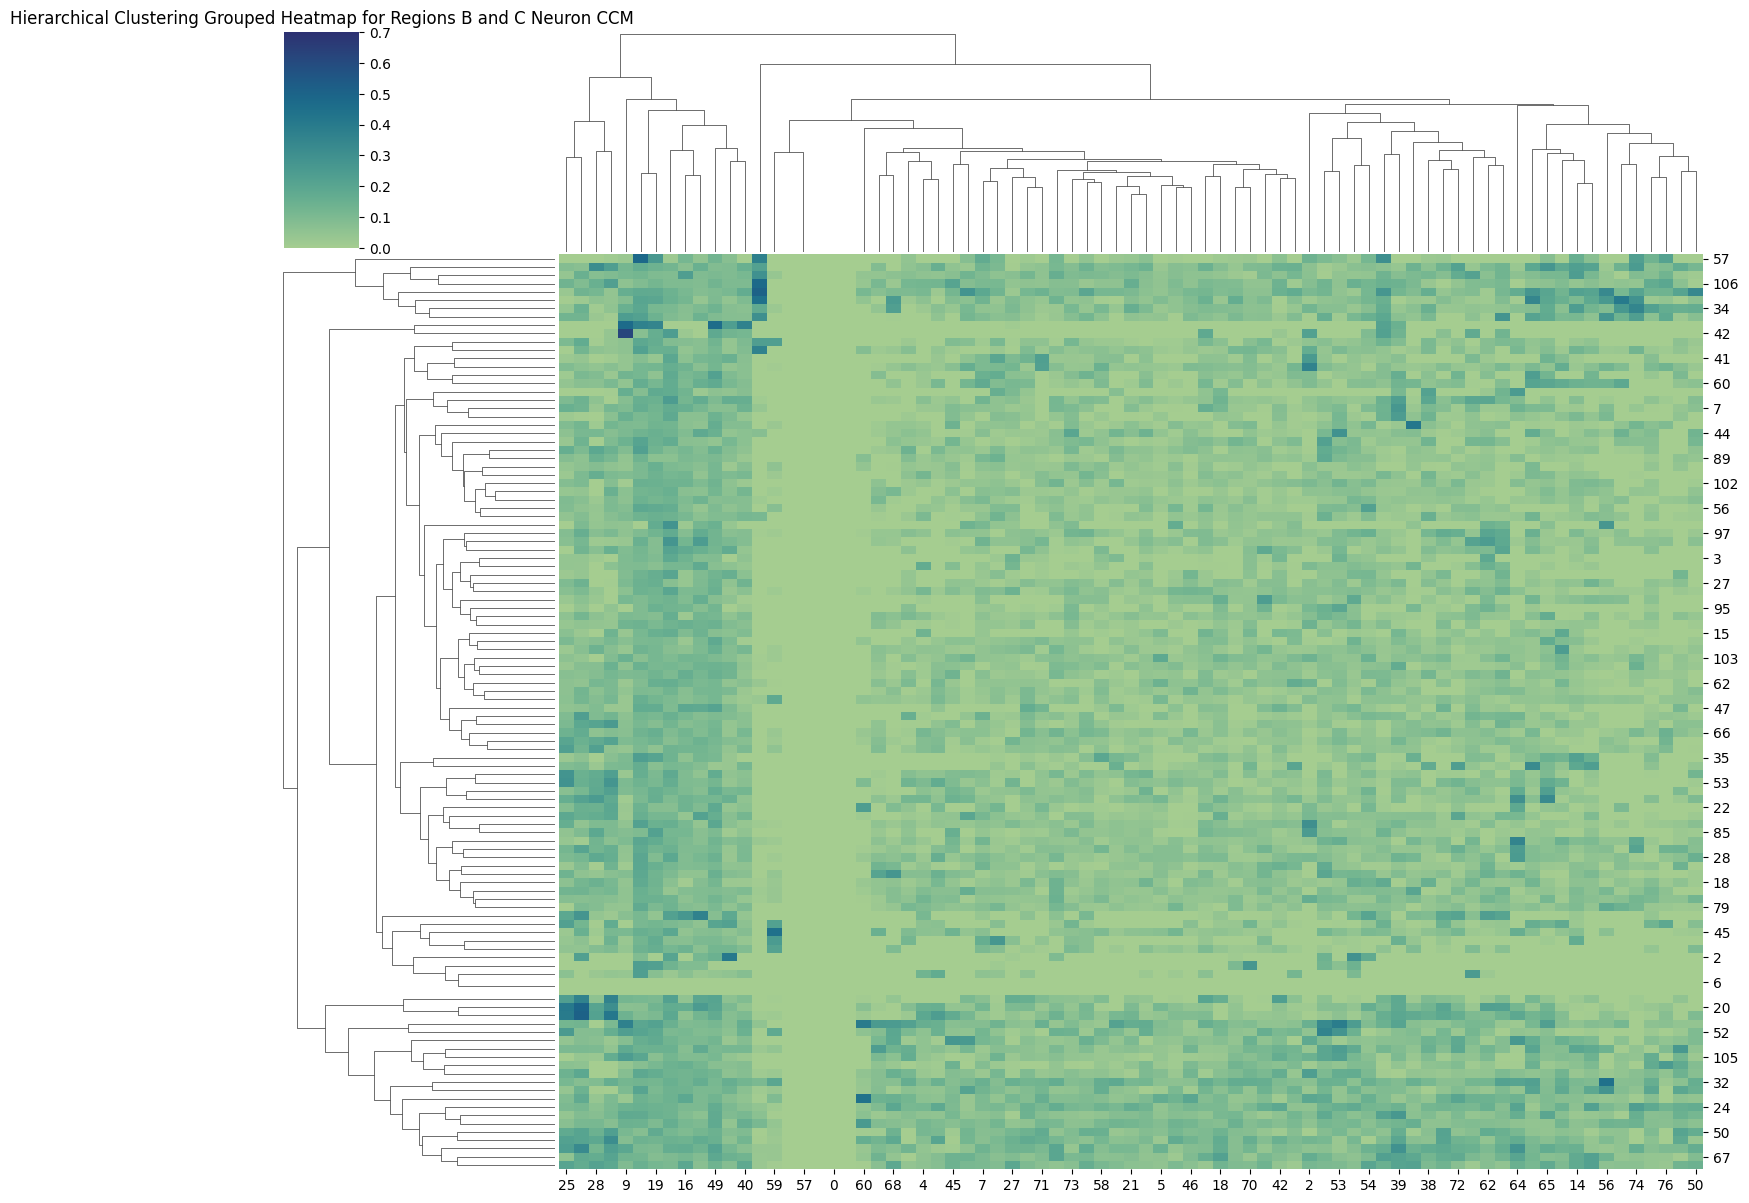

In [133]:
sns.clustermap(corr_matrix_BC, method="complete", cmap='crest', annot=False, vmin=0, vmax=.7, figsize=(15,12));
plt.title("Hierarchical Clustering Grouped Heatmap for Regions B and C Neuron CCM")

In [115]:

def group_corr_matrix(matrix, cutoff):
   # Clusterize the data
    labels = fcluster(Z, cutoff, criterion='distance')


In [116]:
clusters = group_corr_matrix(corr_matrix_BC)

In [118]:
clusters.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [95]:
corr_matrix_BC[np.isnan(corr_matrix_BC)] = 0

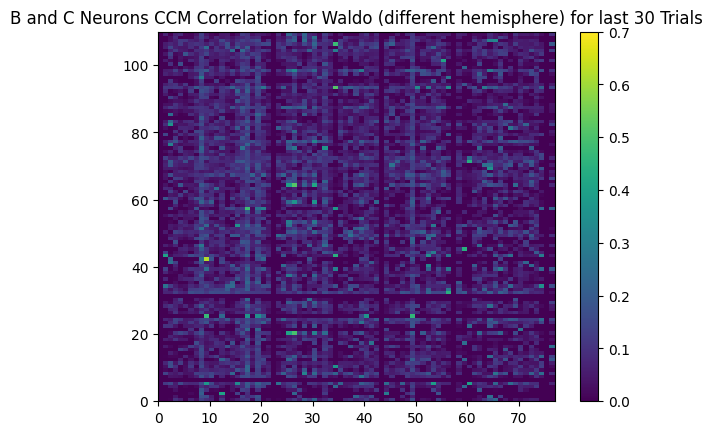

In [97]:
fig, ax = plt.subplots()
c = plt.pcolor(corr_matrix_BC)
plt.title("B and C Neurons CCM Correlation for Waldo (different hemisphere) for last 30 Trials")
plt.clim(0,.7)
fig.colorbar(c)
plt.show()

In [87]:
fNeurons

[133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215]

In [89]:
tau = 1
E = 4
L = 2400
corr_matrix_BF= np.empty([110,83])
i = 0
for k in range(0,110):
    j = 0
    for l in range(133,216):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
        ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
        corr_matrix_BF[i][j]= max(ccm_XY, ccm_YX)
        j+=1
    i+=1
corr_matrix_BF.shape

(110, 83)

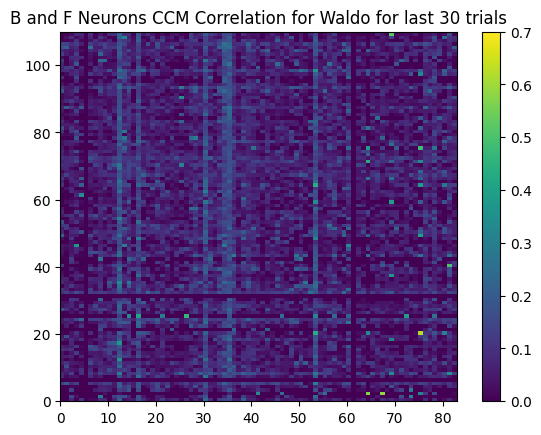

In [93]:
corr_matrix_BF[np.isnan(corr_matrix_BF)] = 0
fig, ax = plt.subplots()
c = plt.pcolor(corr_matrix_BF)
plt.title("B and F Neurons CCM Correlation for Waldo for last 30 trials")
plt.clim(0,.7)
fig.colorbar(c)
plt.show()

In [77]:
tau = 1
E = 4
L = 2400
optimal_embed_dim = np.empty([77,77])
corr_matrix_C = np.empty([77,77])
i = 0
for k in range(306,383):
    j = 0
    for l in range(306,383):
        X = smoothed[k]
        Y = smoothed[l]
        if(i<j):
            ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
            corr_matrix_C[i][j]= ccm_XY
        else:
            ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
            corr_matrix_C[i][j]= ccm_YX
        j+=1
    i+=1
corr_matrix_C.shape

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


(77, 77)

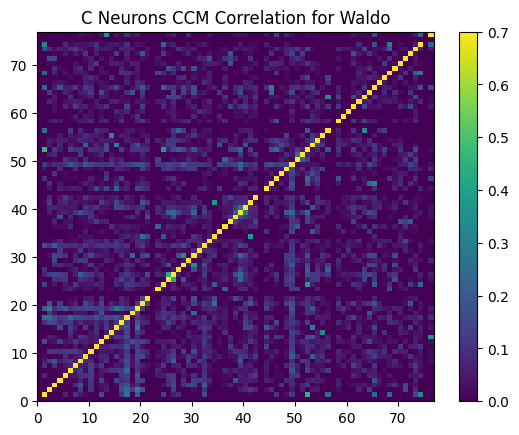

In [78]:
corr_matrix_C[np.isnan(corr_matrix_C)] = 0
fig, ax = plt.subplots()
c = plt.pcolor(corr_matrix_C)
plt.title("C Neurons CCM Correlation for Waldo")
plt.clim(0,.7)
fig.colorbar(c)
plt.show()

In [100]:
def plot_CCM_matrix(matrix, title):
    matrix[np.isnan(matrix)] = 0
    fig, ax = plt.subplots()
    c = plt.pcolor(matrix)
    fig.colorbar(c)
    plt.title(title)
    plt.show()

In [129]:
fNeurons

[133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215]

In [115]:
len(range(10,25))

20

In [122]:
opt_embed_dims = np.empty([15, 15])
i = 0
for k in range(310,325):
    j = 0
    for l in range(310,325):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = -1000
        optimal_embed_dim = 0
        for dim in range (1,7):
            if(np.isnan(ccm(X, Y, tau, dim, L).causality()[0])):
               ccm_XY = 0
            elif ccm(X, Y, tau, dim, L).causality()[0] > ccm_XY:
                ccm_XY = ccm(X, Y, tau, dim, L).causality()[0]
                optimal_embed_dim = dim
        opt_embed_dims[i][j] = optimal_embed_dim
        print(opt_embed_dims[i][j])
        j+=1
    i+=1
opt_embed_dims.shape

1.0
0.0
0.0
6.0
6.0
6.0
0.0
5.0
6.0
6.0
6.0
6.0
6.0
5.0
6.0
5.0
1.0
6.0
0.0
6.0
6.0
6.0
6.0
4.0
4.0
3.0
6.0
5.0
6.0
5.0
6.0
0.0
1.0
0.0
6.0
6.0
6.0
6.0
6.0
4.0
4.0
3.0
6.0
5.0
3.0
6.0
6.0
0.0
3.0
5.0
6.0
6.0
6.0
5.0
3.0
4.0
6.0
6.0
5.0
5.0
5.0
3.0
5.0
5.0
1.0
6.0
6.0
5.0
5.0
4.0
6.0
6.0
6.0
6.0
5.0
6.0
4.0
5.0
5.0
6.0
1.0
6.0
4.0
6.0
5.0
3.0
6.0
6.0
5.0
6.0
4.0
6.0
5.0
6.0
5.0
6.0
1.0
1.0
6.0
6.0
6.0
5.0
6.0
6.0
5.0
6.0
1.0
6.0
5.0
6.0
6.0
6.0
1.0
6.0
6.0
5.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
6.0
6.0
6.0
6.0
1.0
4.0
1.0
5.0
6.0
6.0
6.0
5.0
3.0
6.0
1.0
6.0
6.0
6.0
2.0
5.0
1.0
5.0
5.0
6.0
5.0
5.0
6.0
3.0
5.0
6.0
6.0
6.0
6.0
2.0
6.0
6.0
1.0
6.0
6.0
5.0
6.0
1.0
2.0
3.0
6.0
5.0
5.0
6.0
6.0
5.0
6.0
6.0
1.0
6.0
5.0
3.0
6.0
2.0
6.0
4.0
6.0
6.0
6.0
3.0
6.0
4.0
1.0
6.0
1.0
6.0
5.0
6.0
6.0
4.0
6.0
6.0
6.0
6.0
3.0
6.0
5.0
2.0
5.0
5.0
1.0
6.0
2.0
3.0
6.0
6.0
6.0
6.0
6.0
5.0
6.0
3.0
5.0
6.0
6.0
6.0
1.0


(15, 15)

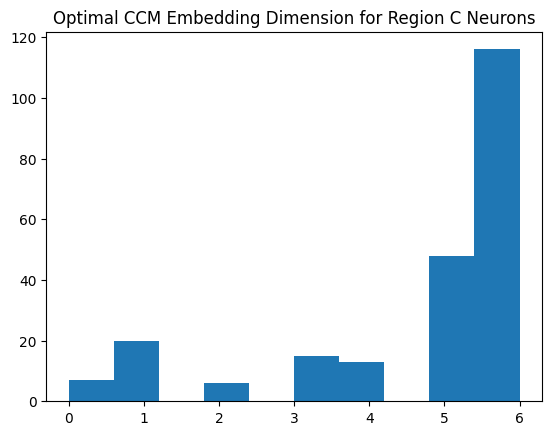

In [123]:
plt.hist(opt_embed_dims.ravel())
plt.title("Optimal CCM Embedding Dimension for Region C Neurons")
plt.show()   

In [44]:
len(range(384,543))

159

In [47]:
opt_embed_dims_D = np.empty([159, 159])
i = 0
for k in range(384,443):
    j = 0
    for l in range(384,443):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = -1000
        optimal_embed_dim = 0
        for dim in range (1,7):
            if(np.isnan(ccm(X, Y, tau, dim, L).causality()[0])):
                ccm_XY = 0
            elif ccm(X, Y, tau, dim, L).causality()[0] > ccm_XY:
                ccm_XY = ccm(X, Y, tau, dim, L).causality()[0]
                optimal_embed_dim = dim
        opt_embed_dims_D[i][j]= optimal_embed_dim
        print(opt_embed_dims_D[i][j])
        j+=1
    i+=1
opt_embed_dims_D.shape

3.0
0.0
6.0
0.0
3.0
0.0
0.0
6.0
0.0
4.0
6.0
6.0
2.0
2.0
3.0
6.0
0.0
6.0
3.0
0.0
5.0
4.0
0.0
4.0
0.0
0.0
0.0
0.0
6.0
6.0
6.0
6.0
0.0
0.0
5.0
4.0
0.0
5.0
0.0
6.0
5.0
5.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
0.0
4.0
5.0
6.0
0.0
0.0
0.0
1.0
5.0
5.0
4.0
0.0
4.0
5.0
6.0
5.0
6.0
6.0
5.0
6.0
6.0
3.0
6.0
5.0
0.0
0.0
4.0
6.0
0.0
0.0
0.0
0.0
3.0
0.0
6.0
6.0
6.0
6.0
1.0
5.0
4.0
6.0
4.0
5.0
5.0
6.0
3.0
5.0
4.0
0.0
4.0
6.0
4.0
6.0
3.0
4.0
6.0
6.0
0.0
0.0
4.0
6.0
5.0
0.0
6.0
2.0
6.0
1.0
6.0
5.0
0.0
6.0
6.0
6.0
4.0
5.0
6.0
5.0
4.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
4.0
0.0
1.0
0.0
3.0
6.0
0.0
5.0
6.0
6.0
5.0
4.0
3.0
6.0
6.0
4.0
2.0
6.0
6.0
6.0
4.0
5.0
0.0
5.0
6.0
1.0
3.0
5.0
4.0
6.0
6.0
0.0
6.0
4.0
6.0
6.0
0.0
0.0
0.0
0.0
6.0
1.0
3.0
0.0
6.0
3.0
6.0
6.0
5.0
6.0
5.0
4.0
6.0
6.0
4.0
6.0
5.0
5.0
2.0
6.0
0.0
6.0
5.0
5.0
0.0
5.0
6.0
6.0
6.0
6.0
1.0
6.0
2.0
6.0
5.0
1.0
6.0
6.0
4.0
6.0
3.0
0.0
3.0
6.0
1.0
6.0
0.0
1.0
6.0
4.0
5.0
0.0
6.0
2.0
6.0
0.0
6.0
6.0
0.0
6.0
4.0
1.0
6.0
3.0
3.0
6.0
6.0
5.0
6.0
6.0
6.0


(159, 159)

In [57]:
opt_embed_dims_D[100][100]

2e-323

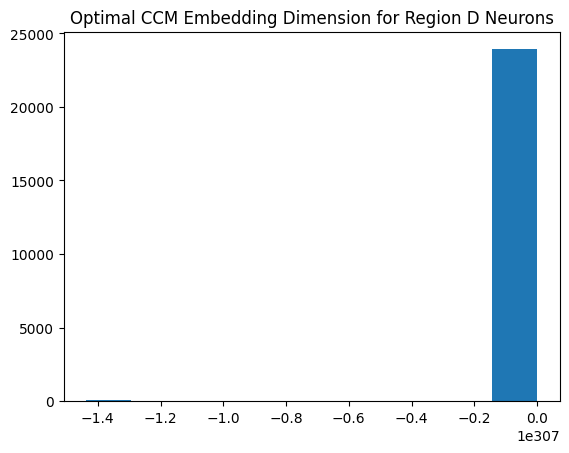

In [63]:
plt.hist(opt_embed_dims_D.ravel())
plt.title("Optimal CCM Embedding Dimension for Region D Neurons")
plt.show()   

In [31]:
len(dNeurons)

49

In [ ]:
opt_embed_dims_A = np.empty([82, 82])
i = 0
for k in range(133,215):
    j = 0
    for l in range(133,215):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = -1000
        optimal_embed_dim = 0
        for dim in range (1,7):
            if(np.isnan(ccm(X, Y, tau, dim, L).causality()[0])):
               ccm_XY = 0
            elif ccm(X, Y, tau, dim, L).causality()[0] > ccm_XY:
                ccm_XY = ccm(X, Y, tau, dim, L).causality()[0]
                optimal_embed_dim = dim
        opt_embed_dims_A[i][j]= optimal_embed_dim
        print(opt_embed_dims_A[i][j])
        j+=1
    i+=1
opt_embed_dims_A.shape

In [28]:
opt_embed_dims_A = np.empty([82, 82])
i = 0
for k in range(133,215):
    j = 0
    for l in range(133,215):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = -1000
        optimal_embed_dim = 0
        for dim in range (1,7):
            if(np.isnan(ccm(X, Y, tau, dim, L).causality()[0])):
               ccm_XY = 0
            elif ccm(X, Y, tau, dim, L).causality()[0] > ccm_XY:
                ccm_XY = ccm(X, Y, tau, dim, L).causality()[0]
                optimal_embed_dim = dim
        opt_embed_dims_A[i][j]= optimal_embed_dim
        print(opt_embed_dims_A[i][j])
        j+=1
    i+=1
opt_embed_dims_A.shape

1.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


6.0
6.0
6.0
6.0
0.0
2.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
6.0
4.0
0.0
5.0
5.0
5.0
6.0
6.0
0.0
4.0
6.0
5.0
5.0
4.0
6.0
6.0
6.0
6.0
5.0
6.0
6.0
5.0
6.0
6.0
6.0
6.0
3.0
6.0
6.0
6.0
6.0
5.0
5.0
0.0
5.0
6.0
0.0
6.0
0.0
5.0
3.0
6.0
5.0
0.0
6.0
0.0
2.0
0.0
0.0
6.0
0.0
6.0
5.0
6.0
6.0
4.0
6.0
3.0
4.0
0.0
6.0
5.0
6.0
5.0
0.0
6.0
6.0
1.0
3.0
4.0
0.0
0.0
6.0
3.0
5.0
4.0
5.0
5.0
5.0
6.0
3.0
4.0
6.0
2.0
6.0
4.0
6.0
5.0
6.0
5.0
5.0
6.0
0.0
5.0
6.0
6.0
5.0
6.0
6.0
5.0
6.0
5.0
2.0
0.0
6.0
6.0
4.0
5.0
5.0
6.0
5.0
6.0
6.0
0.0
6.0
0.0
5.0
6.0
0.0
6.0
6.0
4.0
6.0
6.0
6.0
0.0
6.0
0.0
3.0
5.0
0.0
6.0
5.0
6.0
6.0
6.0
3.0
6.0
4.0
5.0
6.0
0.0
6.0
2.0
6.0
5.0
0.0
2.0
6.0
1.0
1.0
6.0
1.0
0.0
2.0
1.0
6.0
6.0
5.0
5.0
6.0
6.0
6.0
1.0
6.0
0.0
0.0
6.0
5.0
5.0
6.0
5.0
5.0
4.0
6.0
6.0
6.0
4.0
5.0
5.0
5.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
1.0
2.0
4.0
6.0
6.0
3.0
6.0
6.0
1.0
5.0
6.0
5.0
6.0
2.0
6.0
6.0
6.0
5.0
4.0
2.0
0.0
6.0
1.0
0.0
5.0
6.0
5.0
6.0
3.0
1.0
5.0
1.0
6.0
1.0
0.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
1.0
6.0
1.0
6.0


(82, 82)

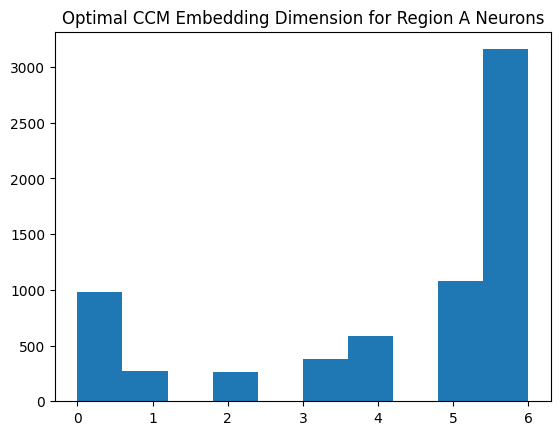

In [29]:
plt.hist(opt_embed_dims_A.ravel())
plt.title("Optimal CCM Embedding Dimension for Region A Neurons")
plt.show()   

In [131]:
opt_embed_dims = np.empty([82, 82])
i = 0
for k in range(133,215):
    j = 0
    for l in range(133,215):
        X = smoothed[k]
        Y = smoothed[l]
        ccm_XY = -1000
        optimal_embed_dim = 0
        for dim in range (1,7):
            if(np.isnan(ccm(X, Y, tau, dim, L).causality()[0])):
               ccm_XY = 0
            elif ccm(X, Y, tau, dim, L).causality()[0] > ccm_XY:
                ccm_XY = ccm(X, Y, tau, dim, L).causality()[0]
                optimal_embed_dim = dim
        opt_embed_dims[i][j] = optimal_embed_dim
        print(opt_embed_dims[i][j])
        j+=1
    i+=1

1.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


6.0
6.0
6.0
6.0
0.0
2.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
6.0
4.0
0.0
5.0
5.0
5.0
6.0
6.0
0.0
4.0
6.0
5.0
5.0
4.0
6.0
6.0
6.0
6.0
5.0
6.0
6.0
5.0
6.0
6.0
6.0
6.0
3.0
6.0
6.0
6.0
6.0
5.0
5.0
0.0
5.0
6.0
0.0
6.0
0.0
5.0
3.0
6.0
5.0
0.0
6.0
0.0
2.0
0.0
0.0
6.0
0.0
6.0
5.0
6.0
6.0
4.0
6.0
3.0
4.0
0.0
6.0
5.0
6.0
5.0
0.0
6.0
6.0
1.0
3.0
4.0
0.0
0.0
6.0
3.0
5.0
4.0
5.0
5.0
5.0
6.0
3.0
4.0
6.0
2.0
6.0
4.0
6.0
5.0
6.0
5.0
5.0
6.0
0.0
5.0
6.0
6.0
5.0
6.0
6.0
5.0
6.0
5.0
2.0
0.0
6.0
6.0
4.0
5.0
5.0
6.0
5.0
6.0
6.0
0.0
6.0
0.0
5.0
6.0
0.0
6.0
6.0
4.0
6.0
6.0
6.0
0.0
6.0
0.0
3.0
5.0
0.0
6.0
5.0
6.0
6.0
6.0
3.0
6.0
4.0
5.0
6.0
0.0
6.0
2.0
6.0
5.0
0.0
2.0
6.0
1.0
1.0
6.0
1.0
0.0
2.0
1.0
6.0
6.0
5.0
5.0
6.0
6.0
6.0
1.0
6.0
0.0
0.0
6.0
5.0
5.0
6.0
5.0
5.0
4.0
6.0
6.0
6.0
4.0
5.0
5.0
5.0
5.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
1.0
2.0
4.0
6.0
6.0
3.0
6.0
6.0
1.0
5.0
6.0
5.0
6.0
2.0
6.0
6.0
6.0
5.0
4.0
2.0
0.0
6.0
1.0
0.0
5.0
6.0
5.0
6.0
3.0
1.0
5.0
1.0
6.0
1.0
0.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
1.0
6.0
1.0
6.0


AttributeError: 'numpy.ndarray' object has no attribute 'shapea'

In [109]:
tau = 1
E = 4
L = 2400 
corr_matrix_B = np.empty([110,110])
i = 0
for k in range(0,110):
    j = 0
    for l in range(0,110):
        X = smoothed[k]
        Y = smoothed[l]
        if(i<j):
            ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
            corr_matrix_B[i][j]= ccm_XY
        else:
            ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
            corr_matrix_B[i][j]= ccm_YX
        j+=1
    i+=1
corr_matrix_B.shape

(110, 110)

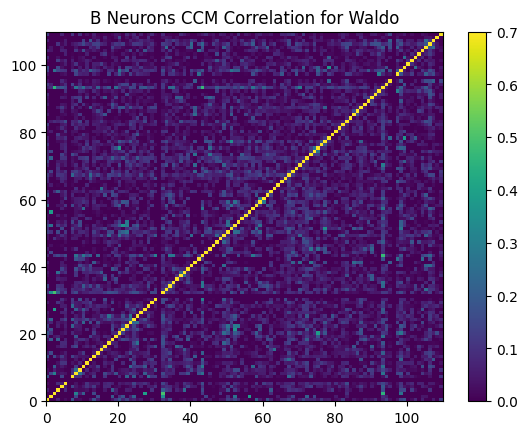

In [128]:
fig, ax = plt.subplots()
c = plt.pcolor(corr_matrix_B)
plt.title("B Neurons CCM Correlation for Waldo")
fig.colorbar(c)
plt.clim(0,.7)
plt.show()

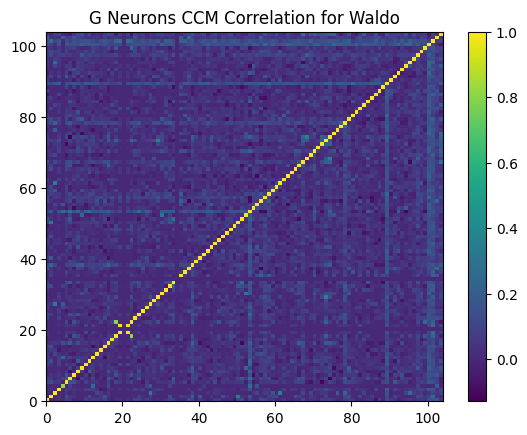

In [102]:
plot_CCM_matrix(corr_matrix_G,"G Neurons CCM Correlation for Waldo")

In [88]:
tau = 1
E = 3
L = 2400
corr_matrix_A = np.empty([173,173])
i = 0
for k in range(110,283):
    j = 0
    for l in range(110,283):
        X = smoothed[k]
        Y = smoothed[l]
        if(i<j):
            ccm_XY = ccm(X, Y, tau, E, L).causality()[0] # define new ccm object # Testing for X -> Y
            corr_matrix_A[i][j]= ccm_XY
        else:
            ccm_YX = ccm(Y, X, tau, E, L).causality()[0] # define new ccm object # Testing for Y -> X    
            corr_matrix_A[i][j]= ccm_YX
        j+=1
    i+=1
corr_matrix_A.shape

(173, 173)

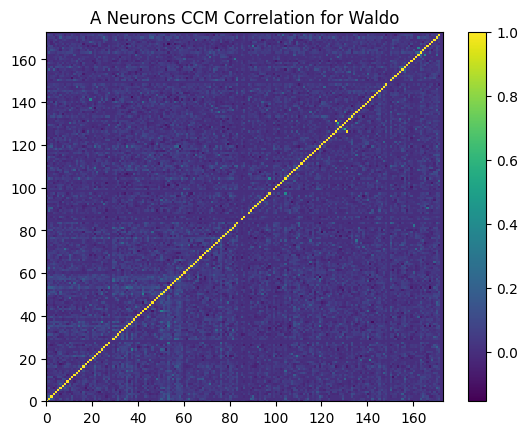

In [89]:
corr_matrix_A[np.isnan(corr_matrix_A)] = 0
fig, ax = plt.subplots()
c = plt.pcolor(corr_matrix_A)
plt.title("A Neurons CCM Correlation for Waldo")
fig.colorbar(c)
plt.show()

  0%|          | 0/239 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|██████████| 239/239 [00:25<00:00,  9.46it/s]


Text(0.5, 1.0, 'CCM between 2 B Neurons')

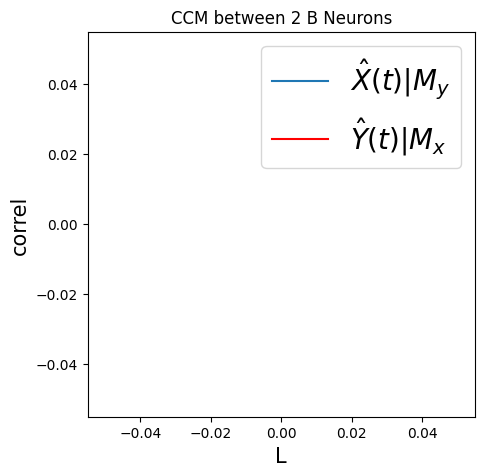

In [76]:
# checking convergence
# Looking at "convergence"
X = smoothed [306]
Y = truncated [407]
L_range = range(10, 2400, 10) # L values to test
tau = 1
E = 5

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in tqdm(L_range): 
    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=15)
plt.ylabel('correl', size=15)
plt.legend(prop={'size': 20})    
plt.title('CCM between 2 B Neurons')